# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [6]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

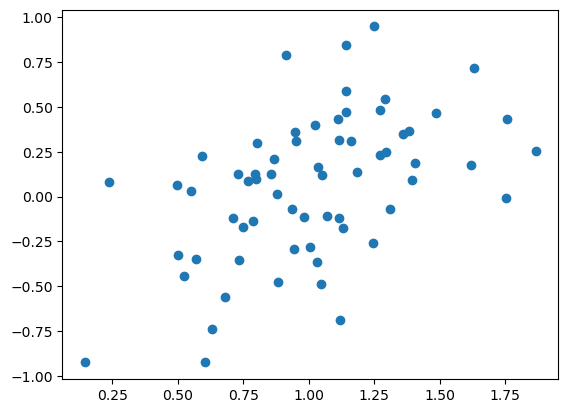

In [7]:
plt.scatter(x.T[0],y)

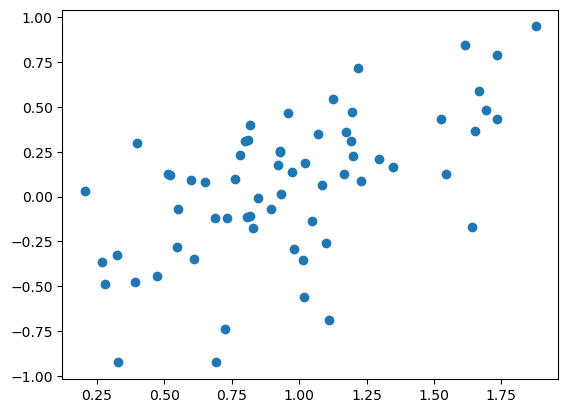

In [8]:
plt.scatter(x.T[1],y)

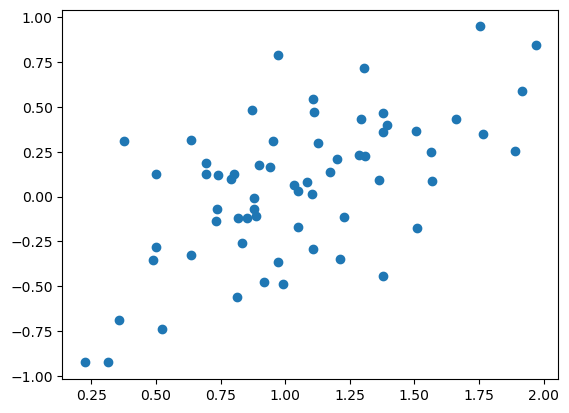

In [9]:
plt.scatter(x.T[2],y)

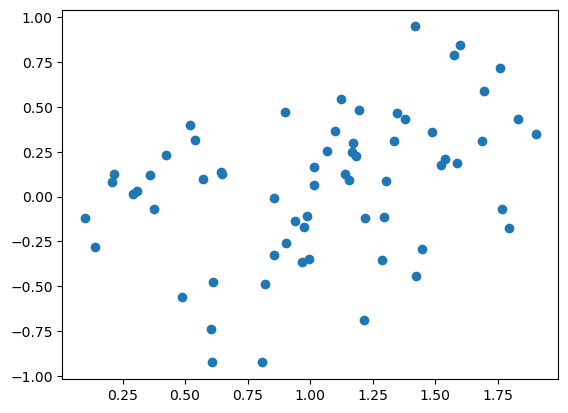

In [10]:
plt.scatter(x.T[3],y)

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [12]:
left = np.linalg.inv(np.dot(x.T, x))

In [13]:
right = np.dot(y.T, x)

In [15]:
np.dot(left, right)

array([ 0.30595874,  0.41735782,  0.37663032, -0.10553021, -0.93829734])

In [ ]:
beta = np.linalg.lstsq(x, y)[0]
beta

In [17]:
pred = np.dot(x, beta)

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

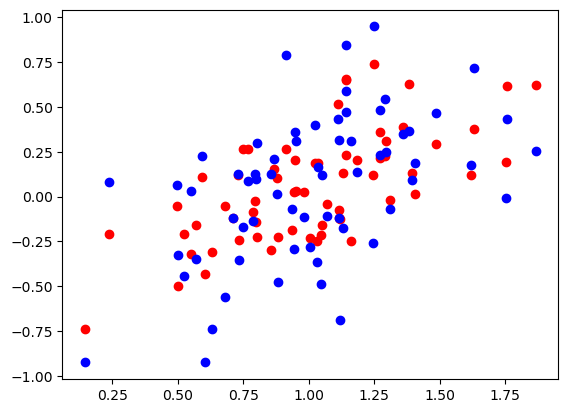

In [18]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

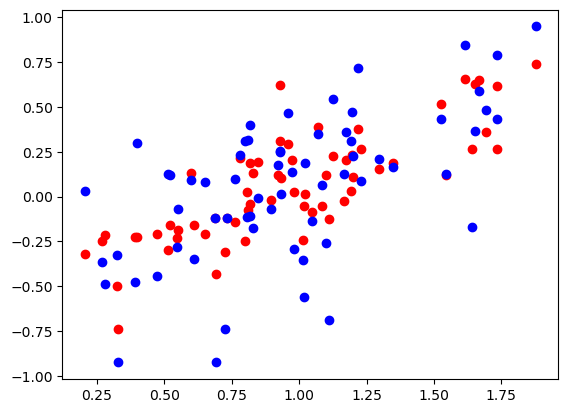

In [19]:
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

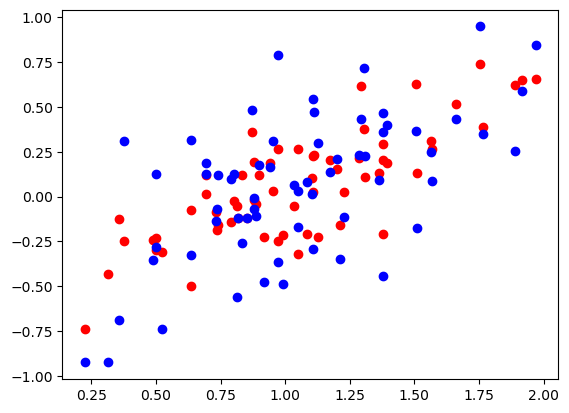

In [20]:
plt.scatter(x.T[2], pred, c='red')
plt.scatter(x.T[2], y, c='b')

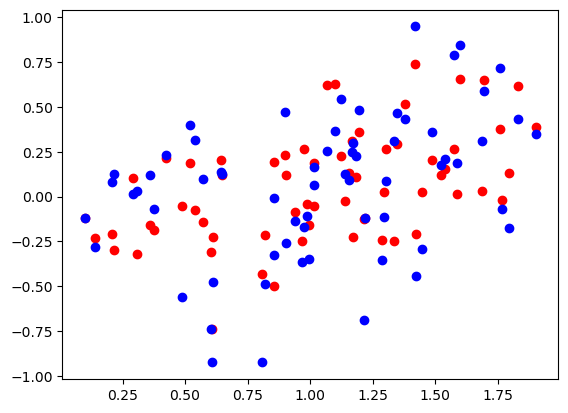

In [21]:
plt.scatter(x.T[3], pred, c='red')
plt.scatter(x.T[3], y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [3]:
import pandas as pd
import numpy as np
credit = pd.read_csv('C:/Users/erinp/Desktop/mlnn/data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [44]:
columns = ['Income', 'Limit', 'Age', 'Balance']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 3.40000e+01, 3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 8.20000e+01, 9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 7.10000e+01, 5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 6.70000e+01, 1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 4.40000e+01, 0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 6.40000e+01, 9.66000e+02, 1.00000e+00]])

In [45]:
y = credit['Rating']
y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [46]:
left = np.linalg.inv(np.dot(X.T, X))

In [47]:
right = np.dot(y.T, X)

In [48]:
np.dot(left, right)

array([1.31880513e-01, 6.26253800e-02, 3.19381468e-02, 1.50244935e-02,
       4.28168820e+01])

In [49]:
beta = np.linalg.lstsq(X, y)[0]
beta

C:\Users\erinp\AppData\Local\Temp\ipykernel_13780\1990189266.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(X, y)[0]


array([1.31880513e-01, 6.26253800e-02, 3.19381468e-02, 1.50244935e-02,
       4.28168820e+01])

In [50]:
pred = np.dot(X, beta)

# 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

Text(0, 0.5, 'Rating')

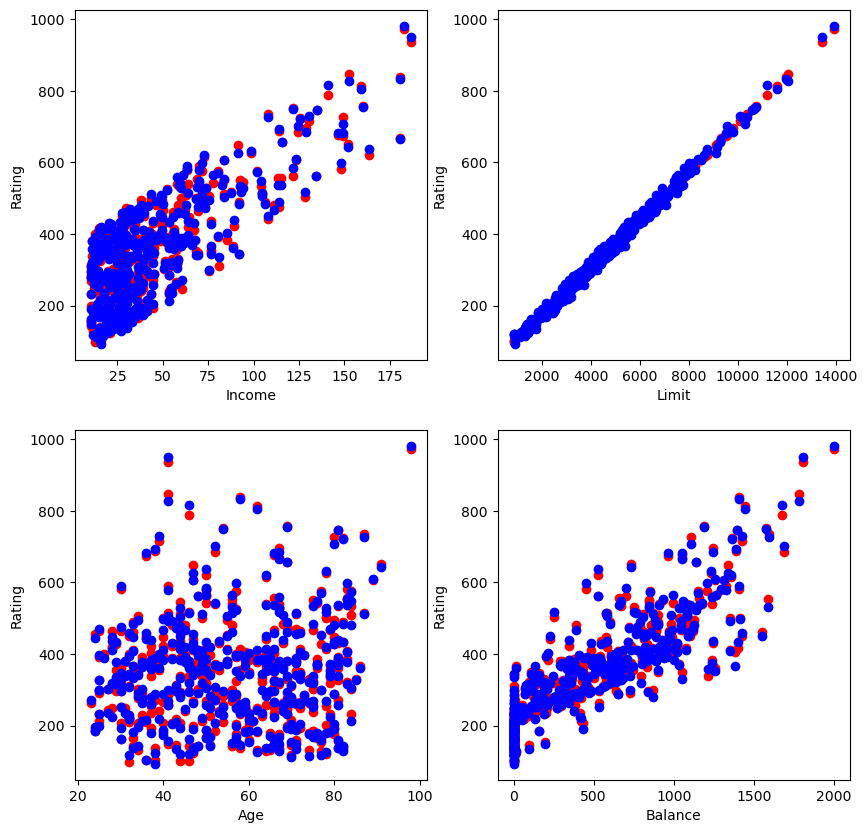

In [53]:
# create subplots

fig, axs = plt.subplots(2, 2, figsize = (10, 10))

# plot income vs rating

axs[0, 0].scatter(X.T[0], pred, c='red')
axs[0,0].scatter(X.T[0], y, c='b')
axs[0,0].set_xlabel('Income')
axs[0,0].set_ylabel('Rating')

# plot limit vs rating

axs[0, 1].scatter(X.T[1], pred, c='red')
axs[0,1].scatter(X.T[1], y, c='b')
axs[0,1].set_xlabel('Limit')
axs[0,1].set_ylabel('Rating')

# plot age vs rating

axs[1,0].scatter(X.T[2], pred, c='red')
axs[1,0].scatter(X.T[2], y, c='b')
axs[1,0].set_xlabel('Age')
axs[1,0].set_ylabel('Rating')

# plot balance vs rating

axs[1, 1].scatter(X.T[3], pred, c='red')
axs[1,1].scatter(X.T[3], y, c='b')
axs[1,1].set_xlabel('Balance')
axs[1,1].set_ylabel('Rating')